In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [85]:
data = pd.read_csv("final_merged.csv")
numeric_data = data.select_dtypes(include=['number'])

C:\Users\smcca\AppData\Local\Temp\ipykernel_7436\2039065251.py:1: DtypeWarning: Columns (5,7,12,15,16,17,18,30,65,82,83,91,92,94,95,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("final_merged.csv")


In [86]:
numeric_data.columns

Index(['Age', 'Surgery', 'Chemotherapy', 'Cohort', 'ER',
       'Neoplasm Histologic Grade', 'HER2', 'Histologic type',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Overall Survival (Months)', 'PR',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Tumor Size',
       'T Stage', 'Days to MRI (From the Date of Diagnosis)', 'Manufacturer',
       'Manufacturer Model Name', 'Scan Options', 'Field Strength (Tesla)',
       'Patient Position During MRI', 'Contrast Agent',
       'Contrast Bolus Volume (mL)', 'TR (Repetition Time)', 'TE (Echo Time)',
       'Acquisition Matrix', 'Slice Thickness ', 'Rows', 'Columns',
       'Reconstruction Diameter ', 'Flip Angle ',
       'FOV Computed (Field of View) in cm ', 'Date of Birth (Days)',
       'Menopause (at diagnosis)', 'Race and Ethnicity',
       'Metastatic at Presentation (Outside of Lymph Nodes)', 'Mol Subtype',
       'Oncotype score', 'Staging(Tumor Size)# [T]',
       'Staging

In [107]:


# Load your SEER dataset (already cleaned and preprocessed)


# Select features and target
# 1. Define the target
data['survival_5yr'] = (data['Survival Months'] >= 60).astype(int)

# 2. Drop target columns from features
excluded = ['Survival Months', 'Vital Status', 'survival_5yr','Unnamed: 3']
numeric_data = data.select_dtypes(include=['number'])
#features = [col for col in numeric_data.columns if col not in excluded]
features = numeric_data[['Age', 'Tumor Size', 'Regional Node Examined',
       'Reginol Node Positive','Reginol Node Positive']]



In [108]:
features = ['Age', 'Tumor Size', 'Regional Node Examined','Reginol Node Positive','N Stage','Radio Therapy','Race','Menopause (at diagnosis)','Chemotherapy',]

Epoch 1/300


c:\Users\smcca\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4472 - auc_7: 0.4915 - loss: 0.7465 - val_accuracy: 0.5308 - val_auc_7: 0.4996 - val_loss: 0.6931
Epoch 2/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5355 - auc_7: 0.5533 - loss: 0.7054 - val_accuracy: 0.5718 - val_auc_7: 0.5311 - val_loss: 0.6868
Epoch 3/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5099 - auc_7: 0.5181 - loss: 0.7060 - val_accuracy: 0.5513 - val_auc_7: 0.5374 - val_loss: 0.6868
Epoch 4/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5142 - auc_7: 0.5146 - loss: 0.7059 - val_accuracy: 0.5191 - val_auc_7: 0.5511 - val_loss: 0.6914
Epoch 5/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5131 - auc_7: 0.5599 - loss: 0.6961 - val_accuracy: 0.5748 - val_auc_7: 0.5488 - val_loss: 0.6874
Epoch 6/300
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5484 - auc_7: 0.5740 - loss: 0.6957 - val_accuracy: 0.5718 - val_auc_7: 0.5458 - val_loss: 0.6869
Epoch 7/300
48/48 ━━━━━━━━━━━━━━━

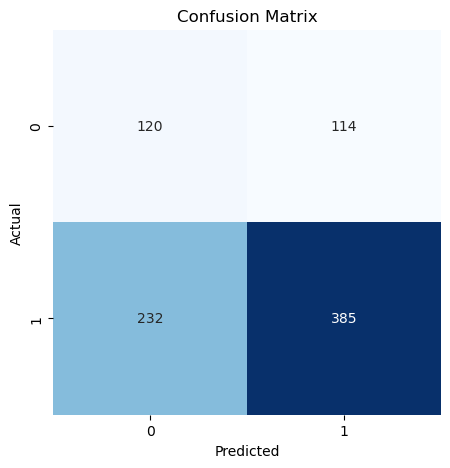

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.51      0.41       234
           1       0.77      0.62      0.69       617

    accuracy                           0.59       851
   macro avg       0.56      0.57      0.55       851
weighted avg       0.65      0.59      0.61       851



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC

# --- Preprocessing ---

# Prepare features and target
X_df = data[features].copy()
X_df['survival_5yr'] = data['survival_5yr']
cleaned = X_df.dropna()

X = cleaned.drop(columns='survival_5yr').values
y = cleaned['survival_5yr'].values

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize AFTER split
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))



# --- Model ---

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Build neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') 
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy', AUC()])

# Train
history = model.fit(X_train, y_train, 
                    epochs=300, 
                    batch_size=64, 
                    validation_split=0.1, 
                    callbacks=[early_stop], 
                    class_weight=class_weights)

# --- Evaluation ---

loss, accuracy, auc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

# Predict
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
